Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11,15,18,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


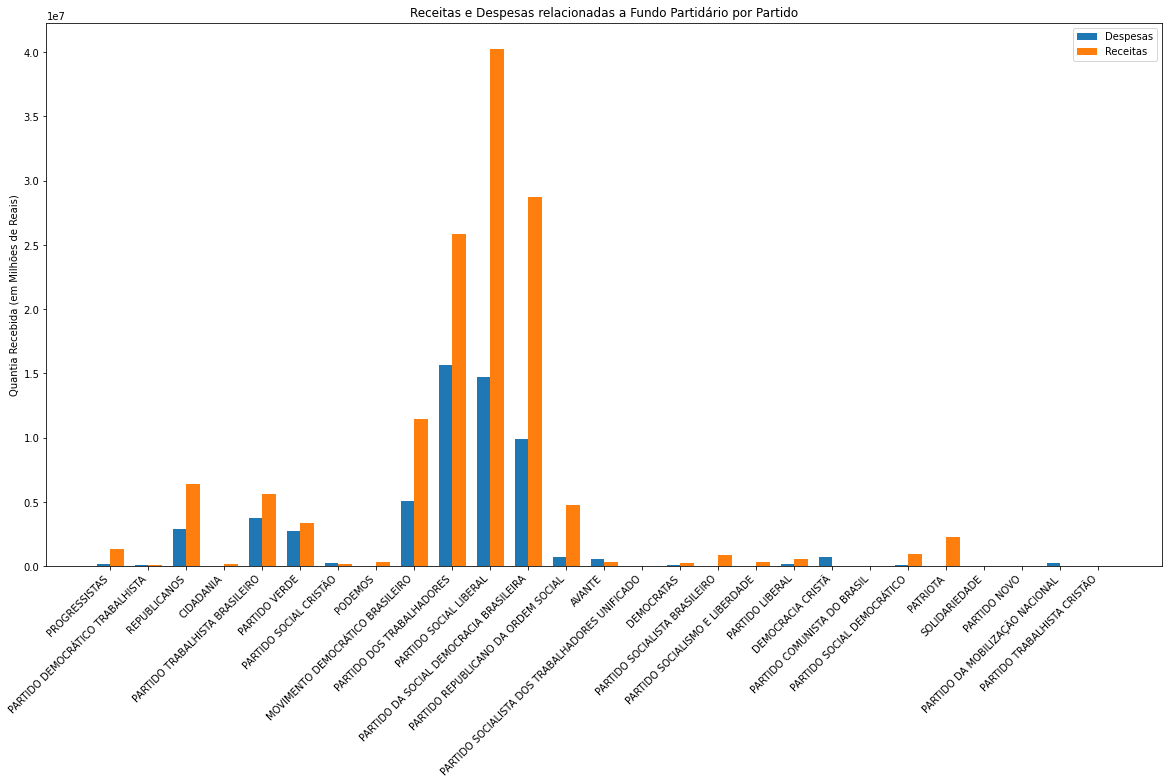

In [ ]:
import pandas as pd
from google.colab import drive
import csv
import numpy as np
import xlrd
import matplotlib.pyplot as plt


drive.mount('/content/drive')

despesas = pd.read_csv('/content/drive/My Drive/3SEM - Fatec/Estrutura de Dados/despesa_anual_2020_BRASIL.csv', error_bad_lines=False, encoding = "ISO-8859-1",sep=';')
receitas = pd.read_csv('/content/drive/My Drive/3SEM - Fatec/Estrutura de Dados/receita_anual_2020_BRASIL.csv', error_bad_lines=False, encoding = "ISO-8859-1",sep=';')
partidos = despesas.NM_PARTIDO.unique()
tipos_despesas = despesas.DS_GASTO.unique()
fundo_partidario_r = {}
fundo_partidario_d = {}
tipos_despesas = {}
todasdespesas = []
todasreceitas = []
for p in partidos:
  fundo_partidario_r[p] = receitas.query('DS_TP_FONTE_RECURSO == "FUNDO PARTIDÁRIO" & NM_PARTIDO == @p')['VR_RECEITA']
  tipos_despesas = despesas.query('CD_FONTE_DESPESA == 1 & NM_PARTIDO == @p')[['VR_GASTO','DS_GASTO']]
  fundo_partidario_d[p] = tipos_despesas.VR_GASTO
  totalr =  0.0
  totald = 0.0
  for valor in fundo_partidario_r[p]:
    valor = valor.replace(',','.')
    valorint = float(valor)
    totalr = totalr + valorint
  for valor in fundo_partidario_d[p]:
    valor = valor.replace(',','.')
    valorint = float(valor)
    totald = totald + valorint
  todasdespesas.append(totald)
  todasreceitas.append(totalr) 
x = np.arange(len(partidos))  
width = 0.35  
fig, ax = plt.subplots(figsize=(20.0,10.0))
rects1 = ax.bar(x - width/2, todasdespesas, width, label='Despesas')
rects2 = ax.bar(x + width/2, todasreceitas, width, label='Receitas')
ax.set_ylabel('Quantia Recebida (em Milhões de Reais)')
ax.set_title('Receitas e Despesas relacionadas a Fundo Partidário por Partido')
ax.set_xticks(x)
ax.set_xticklabels(partidos)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.legend()



